Python Exercise

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [51]:
df = pd.read_csv('BTC-USD.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

ValueError: Inferred frequency D from passed values does not conform to passed frequency MS

In [52]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,54506565949
2021-02-26,47180.464844,48370.785156,44454.843750,46339.761719,46339.761719,350967941479
2021-02-27,46344.773438,48253.269531,45269.027344,46188.453125,46188.453125,45910946382
2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112


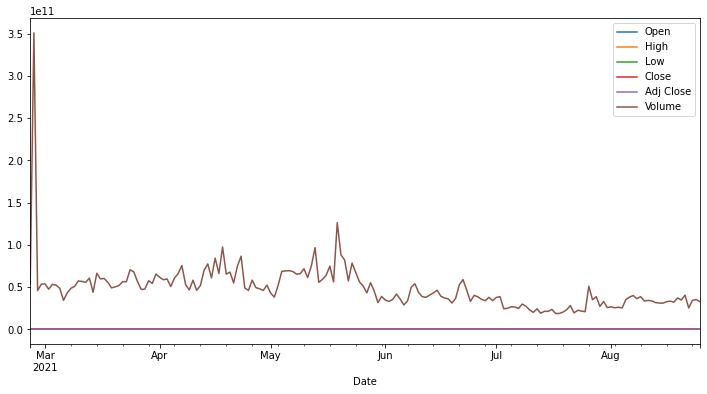

In [53]:
df.plot(figsize=(12,6))

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose


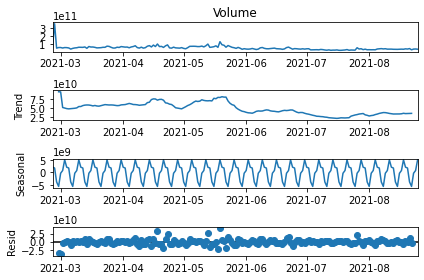

In [55]:
results = seasonal_decompose(df['Volume'])
results.plot();

In [56]:
len(df)

182

In [57]:
train = df.iloc[:170]
test = df.iloc[170:]

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
df.head(), df.tail()

(                    Open          High           Low         Close  \
 Date                                                                 
 2021-02-25  49709.082031  51948.968750  47093.851563  47093.851563   
 2021-02-26  47180.464844  48370.785156  44454.843750  46339.761719   
 2021-02-27  46344.773438  48253.269531  45269.027344  46188.453125   
 2021-02-28  46194.015625  46716.429688  43241.617188  45137.769531   
 2021-03-01  45159.503906  49784.015625  45115.093750  49631.242188   
 
                Adj Close        Volume  
 Date                                    
 2021-02-25  47093.851563   54506565949  
 2021-02-26  46339.761719  350967941479  
 2021-02-27  46188.453125   45910946382  
 2021-02-28  45137.769531   53443887451  
 2021-03-01  49631.242188   53891300112  ,
                     Open          High           Low         Close  \
 Date                                                                 
 2021-08-21  49327.074219  49717.019531  48312.199219  48905.492

In [60]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_train = scaler.transform(test)

In [80]:
scaled_train[:10]

array([[0.53411664, 0.50484513, 0.51880034, 0.51310368, 0.51310368,
        0.03739951],
       [0.51294637, 0.48294182, 0.50084936, 0.51162157, 0.51162157,
        0.03673001],
       [0.51067206, 0.50187421, 0.50447323, 0.4806827 , 0.4806827 ,
        0.04211238],
       [0.47854679, 0.47651669, 0.46881692, 0.44183177, 0.44183177,
        0.04414287],
       [0.4414937 , 0.44144238, 0.4643628 , 0.44497244, 0.44497244,
        0.04035805],
       [0.44312835, 0.47153075, 0.45338555, 0.50184519, 0.50184519,
        0.05544081],
       [0.50187092, 0.5415723 , 0.53300023, 0.57964639, 0.57964639,
        0.04792246],
       [0.57907663, 0.55264441, 0.58287191, 0.56677595, 0.56677595,
        0.06561871],
       [0.56549812, 0.54539596, 0.57950236, 0.57912635, 0.57912635,
        0.01981754],
       [0.57802709, 0.57524123, 0.60575645, 0.58578872, 0.58578872,
        0.04671283]])

In [125]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [126]:
# Define Generator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [127]:
print(len(scaled_train), len(generator))

12 9


In [128]:
X,y = generator[1]
print(f'Given the array: \n{X.flatten()}')
print(f'Given the array: \n{y}')

Given the array: 
[0.51294637 0.48294182 0.50084936 0.51162157 0.51162157 0.03673001
 0.51067206 0.50187421 0.50447323 0.4806827  0.4806827  0.04211238
 0.47854679 0.47651669 0.46881692 0.44183177 0.44183177 0.04414287]
Given the array: 
[[0.4414937  0.44144238 0.4643628  0.44497244 0.44497244 0.04035805]]


In [129]:
X.shape

(1, 3, 6)

In [149]:
n_input = 6
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [150]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

In [151]:
#Defiine model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [152]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [164]:
# FIT MODEL

model.fit(generator, epochs=5)


Epoch 1/5


InvalidArgumentError:  Specified a list with shape [?,1] from a tensor with shape [1,6]
	 [[node sequential_5/lstm_2/TensorArrayUnstack/TensorListFromTensor (defined at <ipython-input-153-e1a7310d0c43>:3) ]] [Op:__inference_train_function_4104]

Function call stack:
train_function


In [167]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

KeyError: 'loss'

In [166]:
last_train_batch = scaled_train[-6:]

In [159]:
last_train_batch = last_train_batch = last_train_batch.reshape((1, n_input, n_features))

ValueError: cannot reshape array of size 36 into shape (1,6,1)

In [160]:
model.predict(last_train_batch)

ValueError: in user code:

    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Kingdel\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Kingdel\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Kingdel\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Kingdel\anaconda3\lib\site-packages\keras\engine\input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 6)


In [168]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

ValueError: cannot reshape array of size 36 into shape (1,6,1)